In [3]:
import pandas as pd
data = pd.read_csv('GOMEC_UW  data.csv')
# Display the first few rows of the data to understand its structure
data.head()

,Sample #,Start,End,Latitude,Longitude,SST (Results/Flags),SST Flag,Salinity,S Flag,OXYGENUMOL/KG,...,NITRITE UMOL/KG,NITRITE_FLAG_W,NITRATE UMOL/KG,NITRATE_FLAG_W,NITRATE_NITRITE UMOL/KG,NITRATE_NITRITE_FLAG_W,PHOSPHATE UMOL/KG,PHOSPHATE_FLAG_W,PH_TOT @ 25 C,PH_TOT_FLAG_W
0,UW-1,7/18/17 19:01,7/18/17 19:11,24.2344,-82.1918,29.716,2,35.952,2,198.318,...,0.0,2,0.02,2,0.02,2,0.01,2,8.0952,2
1,UW-2,7/18/17 22:00,7/18/17 22:03,24.2456,-82.4374,30.109,2,35.981,2,201.942,...,0.0,2,0.01,2,0.01,2,0.01,2,8.0892,2
2,UW-3,7/19/17 1:00,7/19/17 1:05,24.2875,-82.5982,29.827,2,35.743,2,196.766,...,0.0,2,0.00,2,0.00,2,0.01,2,8.1022,2
3,UW-4,7/19/17 3:59,7/19/17 4:07,24.4253,-83.0874,29.736,2,35.873,2,196.361,...,0.0,2,0.00,2,0.00,2,0.00,2,8.0854,2
4,UW-5,7/19/17 6:59,7/19/17 7:06,25.0568,-83.0731,29.988,2,35.932,2,196.463,...,0.0,2,0.00,2,0.00,2,0.00,2,8.0967,2


In [5]:
data.dtypes

Sample #                    object
Start                       object
End                         object
Latitude                   float64
Longitude                  float64
SST (Results/Flags)        float64
SST Flag                     int64
Salinity                   float64
S Flag                       int64
OXYGENUMOL/KG              float64
OXYGEN_FLAG_W                int64
O2 Temp                    float64
DICUMOL/KG                 float64
DIC_FLAG_W                   int64
pCO2_uatm-20C              float64
pCO2 Flag                    int64
CARBONATE UMOL/KG          float64
CARBONATE_FLAG_W             int64
TA UMOL/KG                 float64
TA_FLAG_W                    int64
SILICATE UMOL/KG           float64
SILICATE_FLAG_W              int64
NITRITE UMOL/KG            float64
NITRITE_FLAG_W               int64
NITRATE UMOL/KG            float64
NITRATE_FLAG_W               int64
NITRATE_NITRITE UMOL/KG    float64
NITRATE_NITRITE_FLAG_W       int64
PHOSPHATE UMOL/KG   

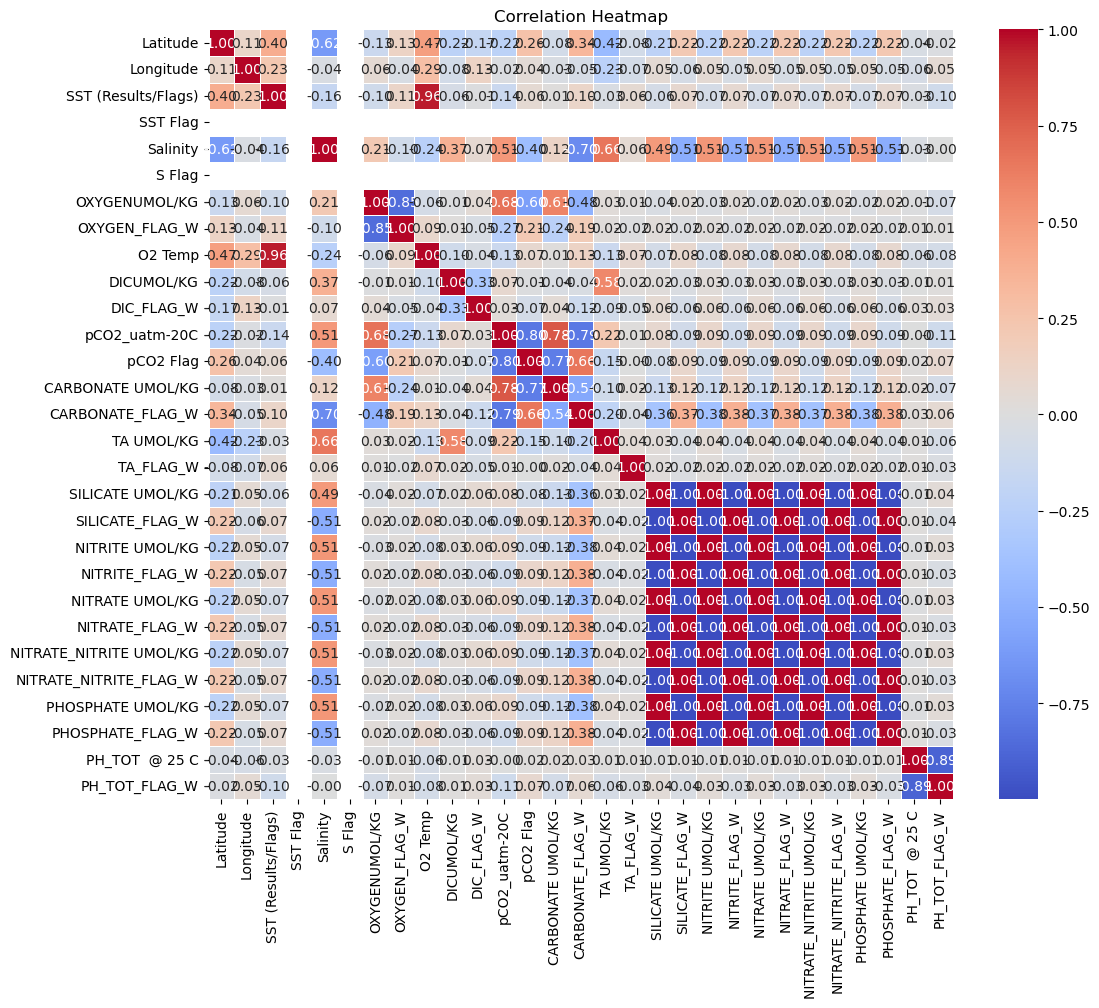

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title to the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [7]:
import numpy as np

# Manually clean key numeric columns using numpy where method
columns_to_keep = [
    'Latitude', 'Longitude', 'Salinity', 'OXYGENUMOL/KG', 'DICUMOL/KG', 
    'pCO2_uatm-20C', 'CARBONATE UMOL/KG', 'TA UMOL/KG', 'PH_TOT  @ 25 C'
]

# Filter the data to keep only these columns
filtered_data = data[columns_to_keep]

# Replace invalid values manually with numpy
filtered_data_cleaned = filtered_data.applymap(lambda x: np.nan if x in [999, -999] else x)

# Drop rows with any missing values
filtered_data_cleaned = filtered_data_cleaned.dropna()

filtered_data_cleaned  

/var/folders/f0/6l0bb_dj4zn47t9z5cng_q580000gn/T/ipykernel_3655/2660553748.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_data_cleaned = filtered_data.applymap(lambda x: np.nan if x in [999, -999] else x)


,Latitude,Longitude,Salinity,OXYGENUMOL/KG,DICUMOL/KG,pCO2_uatm-20C,CARBONATE UMOL/KG,TA UMOL/KG,PH_TOT @ 25 C
0,24.2344,-82.1918,35.952,198.318,2050.72,294.56,242.141,2458.73,8.0952
1,24.2456,-82.4374,35.981,201.942,2041.51,289.16,244.503,2376.29,8.0892
2,24.2875,-82.5982,35.743,196.766,2046.10,293.26,184.952,2389.08,8.1022
3,24.4253,-83.0874,35.873,196.361,2050.27,291.03,194.119,2384.11,8.0854
4,25.0568,-83.0731,35.932,196.463,2045.59,289.04,193.760,2377.98,8.0967
...,...,...,...,...,...,...,...,...,...
149,25.4620,-79.5984,36.034,191.718,2031.61,277.11,234.416,2386.81,8.1025
150,25.5980,-79.5714,36.142,192.393,2033.83,284.37,253.486,2386.13,8.0986
151,26.1543,-79.5553,36.187,192.134,2038.98,282.85,243.675,2392.04,8.1013
152,26.3043,-79.4568,36.283,190.763,2023.21,285.14,246.738,2365.08,8.0962


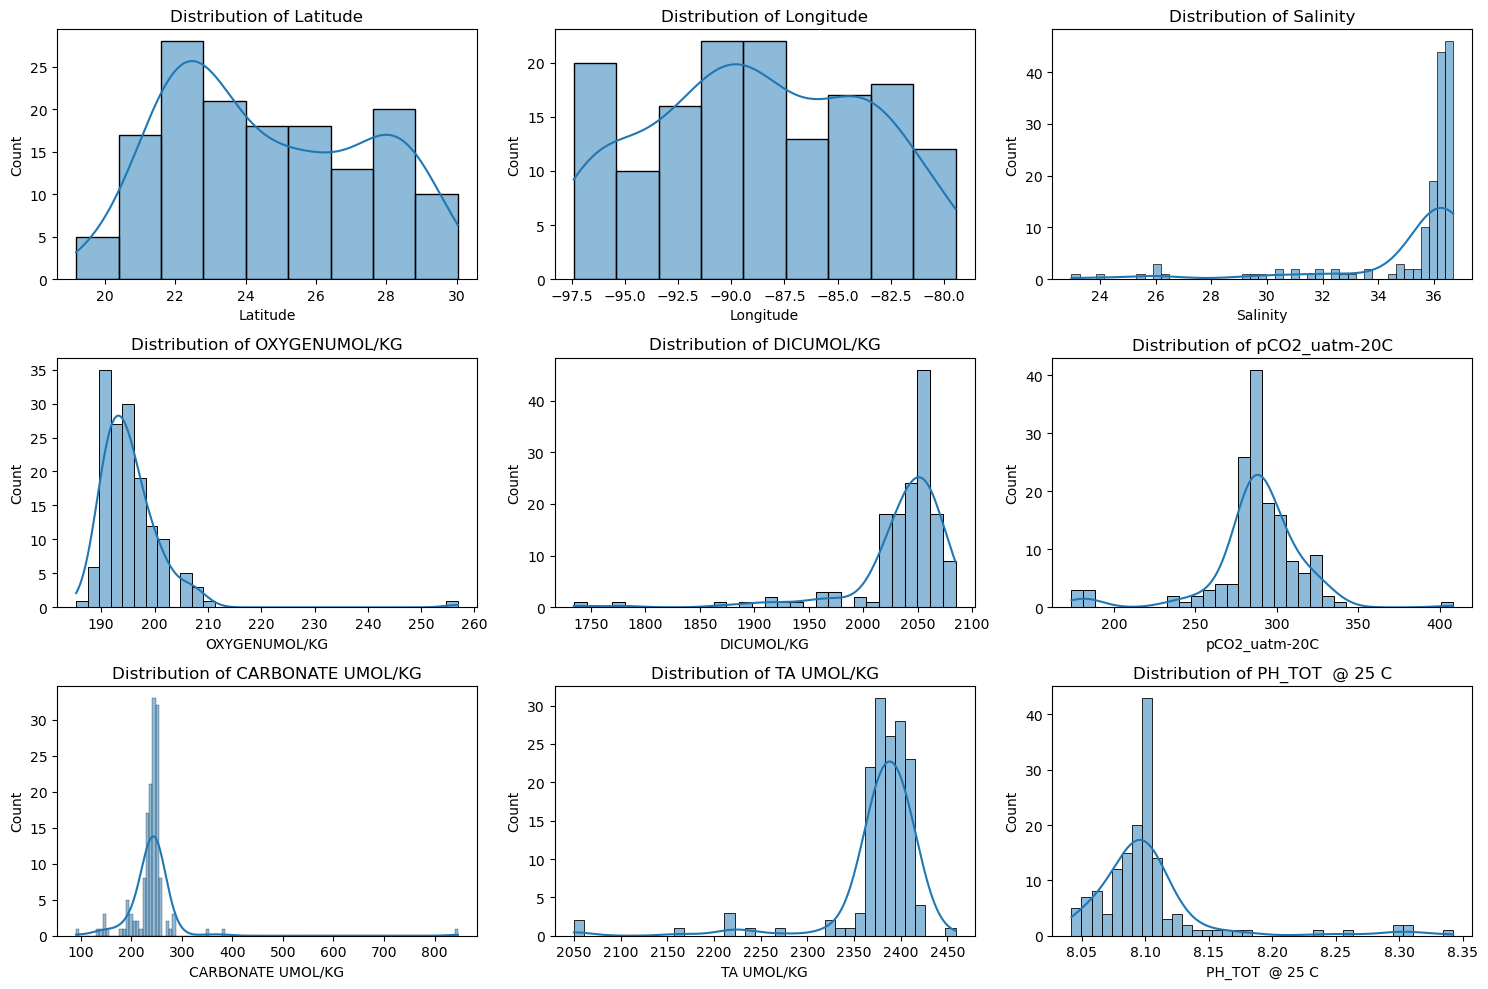

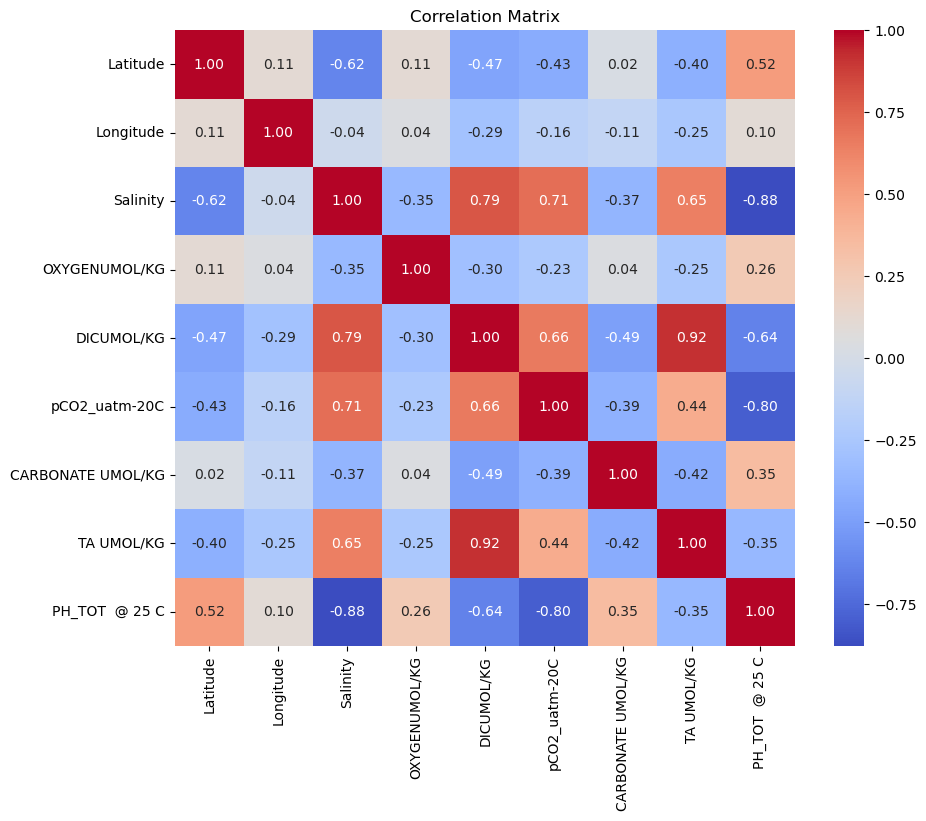

In [9]:
 import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distributions of the cleaned numeric data
plt.figure(figsize=(15, 10))
for i, col in enumerate(filtered_data_cleaned.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(filtered_data_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Create a correlation heatmap to analyze relationships between variables
plt.figure(figsize=(10, 8))
correlation_matrix = filtered_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


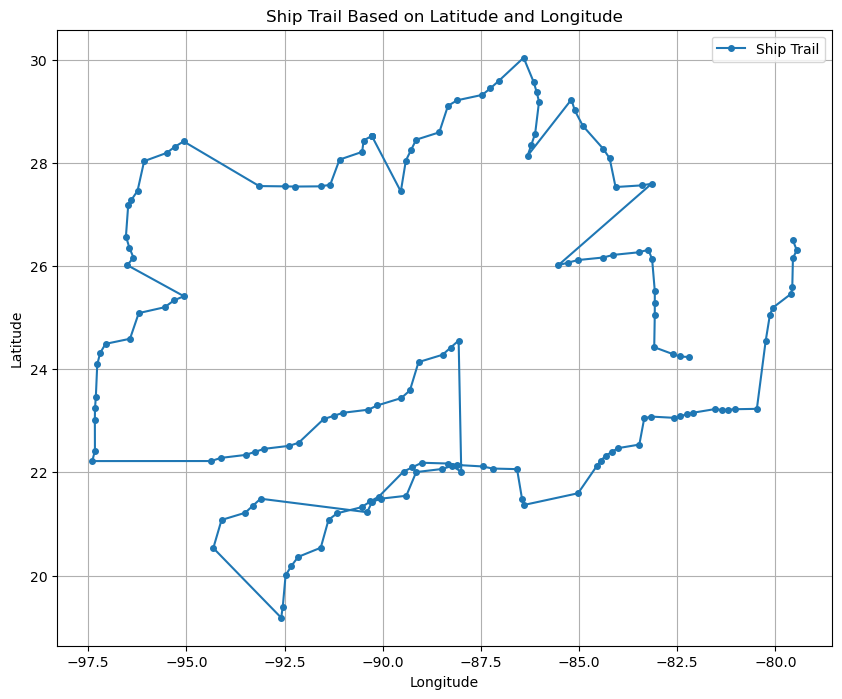

In [21]:
import matplotlib.pyplot as plt

# Plot the trail of the ship based on latitude and longitude
plt.figure(figsize=(10, 8))
plt.plot(data['Longitude'], data['Latitude'], marker='o', linestyle='-', markersize=4, label='Ship Trail')
plt.title('Ship Trail Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/f0/6l0bb_dj4zn47t9z5cng_q580000gn/T/ipykernel_3655/28217552.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Start'] = pd.to_datetime(data['Start'])


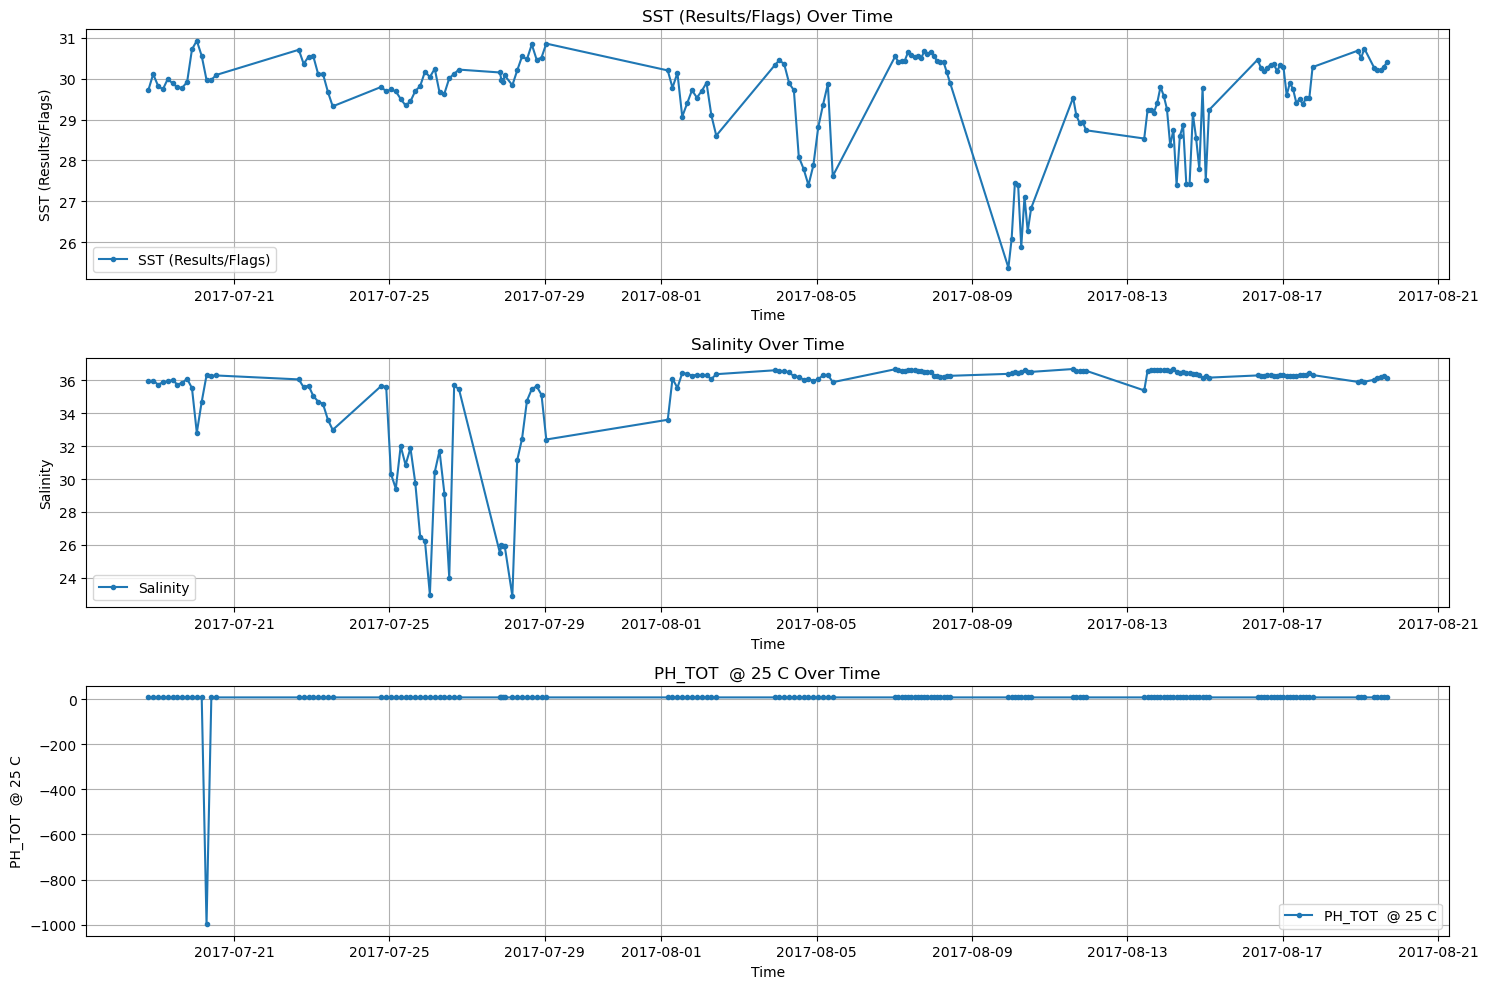

In [23]:
# Convert 'Start' column to datetime for proper time-series plotting
data['Start'] = pd.to_datetime(data['Start'])

# Variables to plot over time
variables_to_plot = ['SST (Results/Flags)', 'Salinity', 'PH_TOT  @ 25 C']

# Plot time series for selected variables
plt.figure(figsize=(15, 10))
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(3, 1, i)
    plt.plot(data['Start'], data[variable], marker='o', linestyle='-', markersize=3, label=variable)
    plt.title(f'{variable} Over Time')
    plt.xlabel('Time')
    plt.ylabel(variable)
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


In [10]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import lightgbm as lgb
from catboost import CatBoostRegressor

# Define features (independent variables) and target (pH)
X = filtered_data_cleaned.drop(columns=['PH_TOT  @ 25 C'])
y = filtered_data_cleaned['PH_TOT  @ 25 C']

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)  # Suppress verbose output for CatBoost
}

# Dictionary to store model results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MAE': mae, 'R²': r2}

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results).T

# Display the results
results_df


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 8
[LightGBM] [Info] Start training from score 8.103042
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

,MAE,R²
Random Forest,0.011120,0.606290
Support Vector Regressor,0.067672,-2.807751
K-Neighbors Regressor,0.007537,0.885649
Decision Tree,0.016867,-0.268930
Linear Regression,0.007768,0.905895
LightGBM,0.013084,0.688136
CatBoost,0.008321,0.794086
